<h1>Breast Cancer Detection Model</h1>

***Objective***

Develop a machine learning model to predict breast cancer malignancy based on diagnostic 
features, with potential to assist in early detection and treatment planning. 

***The goal is to build a machine learning model that predicts whether a tumor is malignant (M) or benign (B) based on various diagnostic features.***

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('breast-cancer.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
# checking for missing data
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [35]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
# dropping the id column
df.drop('id',axis=1,inplace=True)

In [9]:
df['diagnosis'] = df['diagnosis'].map({"M":1, "B":0})

### Exploratory Data Analysis

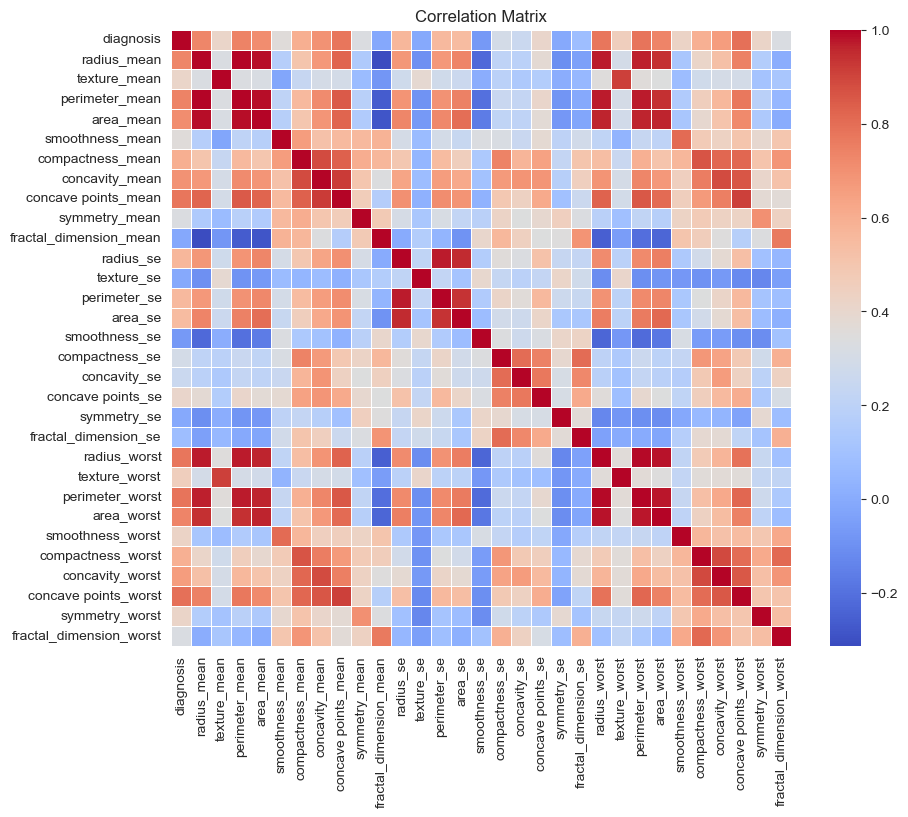

In [16]:
# plotting a heatmap to show multicolinearity
plt.figure(figsize=(10, 8))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [18]:
# Split Features and Target
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [19]:
# scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y,random_state=100)

# model training

In [21]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [22]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [23]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

In [25]:
print("\n Classification Report: \n", classification_report(y_test, y_pred))
print("\n Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("\n ROC AUC Score: \n", roc_auc_score(y_test, y_prob))


 Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       107
           1       0.97      0.98      0.98        64

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171


 Confusion Matrix: 
 [[105   2]
 [  1  63]]

 ROC AUC Score: 
 0.9972254672897197


# Classification Report

***Precision:*** (how many of the predicted positives were positive): high for both classes.

***Recall:*** (how many actual positives were correctly predicted): excellent and balanced.

***F1-Score:*** great harmonic balance between precision and recall.

### Confusion Matrix

True Negatives (class 0): 105

False Positives: 2

False Negatives: 1

True Positives (class 1): 63

The model makes very few mistakes, with only 3 misclassifications out of 171 samples.

***ROC AUC Score: 0.9972***


This is nearly perfect — indicating the model is extremely good at distinguishing between the two classes.

***The following are the ways this result supports the objective***

1. Earlier Detection of Malignant Tumors
High recall (98%) for malignant cases (Class 1) means the model is very unlikely to miss cancer cases, critical for early intervention.

2. Reduce Unnecessary Biopsies
High precision (97%) for malignant cases means few benign cases are wrongly classified as malignant, reducing the risk of unnecessary biopsies.

3. Support for Radiologists
With such high accuracy, this model can be a reliable second opinion tool for radiologists, boosting confidence in diagnostic decisions.

4. Better Resource Allocation
Hospitals can prioritize high-risk patients accurately, ensuring those who need urgent care are attended to first.

5. Understanding Risk Factors
Your model can also help identify which diagnostic features are most important in predicting malignancy (e.g., using feature importance analysis), supporting further medical research.

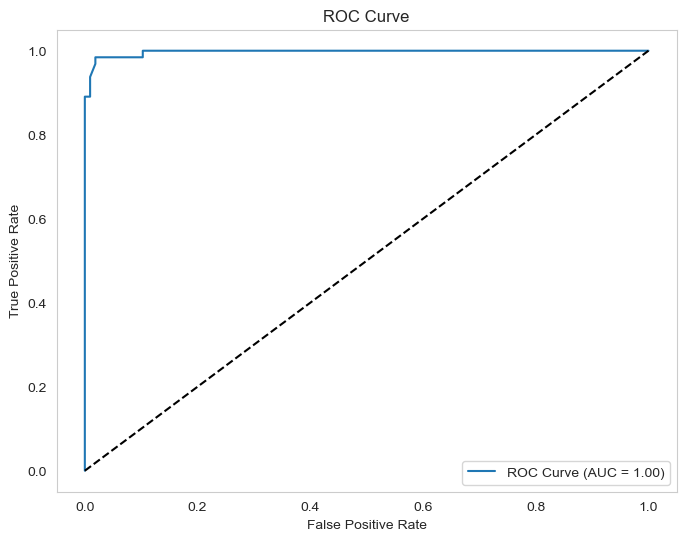

In [29]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

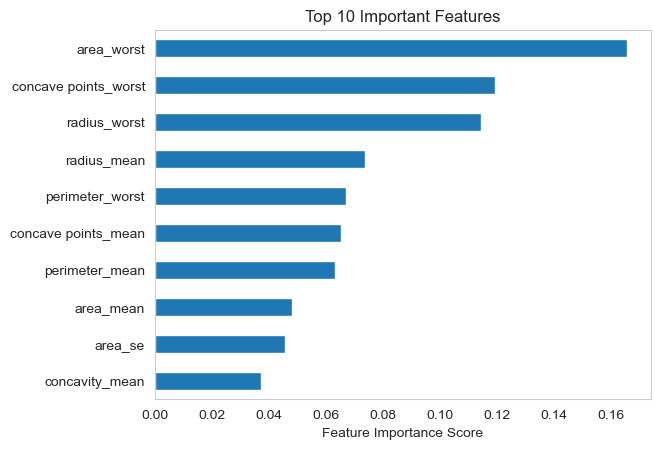

In [30]:
# 9. Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance Score')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

In [32]:
# 10. Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='roc_auc')
print("\nCross-Validated ROC AUC Scores:\n ", scores)
print("Mean AUC: {:.3f} +/- {:.3f}".format(scores.mean(), scores.std()))



Cross-Validated ROC AUC Scores:
  [0.99836227 0.97854569 0.97900132 0.99454365 0.99245473]
Mean AUC: 0.989 +/- 0.008


These Cross-Validated ROC AUC Scores give a powerful summary of the model's ability to generalize well across unseen data.


***Mean AUC: 0.989***

The average ROC AUC score across all 5 folds.

This means your model has excellent discrimination capability.

AUC close to 1.0 indicates this model can almost perfectly separate malignant from benign tumors.



***Standard Deviation (± 0.008)*** 

Shows the variability in the model performance across different data splits.

A low std dev (like 0.008) means the model's performance is very stable and consistent across all folds.

***Conclusion***

This model is high-performing (Mean AUC = 0.989) and reliable (low variance).

It consistently classifies breast tumors with very high accuracy on multiple unseen subsets of the data.

This supports its potential usefulness in real-world diagnostic applications.

### Model Deployment

In [45]:
import os
os.getcwd()

'C:\\Users\\HP\\Downloads\\Power BI Data Jobs\\Python Assignment'

In [47]:
os.listdir()

['.ipynb_checkpoints',
 'App',
 'Breast Cancer Detection Model.ipynb',
 'breast-cancer.csv',
 'breast_cancer_model.pkl',
 'desktop.ini',
 'scaler.pkl',
 'Zion_Tech_Hub_Capstone_Project___Python_for_DSA (1).pdf']

In [48]:
streamlit run app.py

SyntaxError: invalid syntax (3737097518.py, line 1)